In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
cubic = ["Al","Cu","K","Pd","V","W"]
bcc = ["K","V","W"]
fcc = ["Al","Cu","Pd"]
hexagonal = ["Ti","Y","Re"]
all_elements = cubic+hexagonal

In [3]:
def get_mean_data(method,elements,sub_method=None):
    for el in elements:
        if el in ["Ti","Y","Re"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data/{0}_{1}/{2}_atom_convergence.csv".format(el,method,i),"r")
            else:
                f = open("../data/{0}_{1}/{2}_{3}_atom_convergence.csv".format(el,method,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    return outdf

In [4]:
Mueller = get_mean_data("Mueller",all_elements)
Aflow = get_mean_data("AFLOW",all_elements)
Froyen_hcp = get_mean_data("Froyen",hexagonal,sub_method="hcp")
Mueller_hcp = get_mean_data("Mueller",hexagonal)
Froyen_sc = get_mean_data("Froyen",cubic,sub_method="sc")
Froyen_bcc = get_mean_data("Froyen",cubic,sub_method="bcc")
Froyen_fcc = get_mean_data("Froyen",cubic,sub_method="fcc")
Mueller_cubic = get_mean_data("Mueller",cubic)
Hess = get_mean_data("Hess",all_elements)
Hess_bcc = get_mean_data("Hess",bcc)
Hess_fcc = get_mean_data("Hess",fcc)
Hess_hcp = get_mean_data("Hess",hexagonal)
Mueller_bcc = get_mean_data("Mueller",bcc)
Mueller_fcc = get_mean_data("Mueller",fcc)

('element', 'V', 'size', 11)
('element', 'W', 'size', 11)
('element', 'Cu', 'size', 7)
('element', 'Cu', 'size', 9)
('element', 'W', 'size', 10)
('element', 'Al', 'size', 7)
('element', 'Al', 'size', 11)
('element', 'Cu', 'size', 9)
('element', 'Cu', 'size', 11)
('element', 'K', 'size', 7)
('element', 'K', 'size', 11)
('element', 'W', 'size', 11)


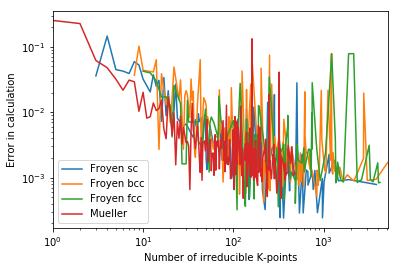

In [5]:
fig, ax = plt.subplots(1,1)
Froyen_sc.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen sc")
Froyen_bcc.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen bcc")
Froyen_fcc.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen fcc")
Mueller_cubic.reset_index().plot(x="index",y="mean",ax=ax,label="Mueller")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
#ax.set_ylim([1E-6,1])
plt.show()

In [99]:
Froy_sc = np.asarray(Froyen_sc.reset_index().loc[:,["index","mean"]])
Froy_bcc = np.asarray(Froyen_bcc.reset_index().loc[:,["index","mean"]])
Froy_fcc = np.asarray(Froyen_fcc.reset_index().loc[:,["index","mean"]])
Froy_hcp = np.asarray(Froyen_hcp.reset_index().loc[:,["index","mean"]])
Muel_cubic = np.asanyarray(Mueller_cubic.reset_index().loc[:,["index","mean"]])
Muel_hcp = np.asanyarray(Mueller_hcp.reset_index().loc[:,["index","mean"]])
Muel = np.asanyarray(Mueller.reset_index().loc[:,["index","mean"]])
Muel_bcc = np.asanyarray(Mueller_bcc.reset_index().loc[:,["index","mean"]])
Muel_fcc = np.asanyarray(Mueller_fcc.reset_index().loc[:,["index","mean"]])
Afl = np.asanyarray(Aflow.reset_index().loc[:,["index","mean"]])
Hes = np.asanyarray(Hess.reset_index().loc[:,["index","mean"]])
Hes_bcc = np.asanyarray(Hess_bcc.reset_index().loc[:,["index","mean"]])
Hes_fcc = np.asanyarray(Hess_fcc.reset_index().loc[:,["index","mean"]])
Hes_hcp = np.asanyarray(Hess_hcp.reset_index().loc[:,["index","mean"]])

In [7]:
def sort_energies(data):
    data = data[np.argsort(data[:,1])]
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp

    return data

In [105]:
Muel = sort_energies(Muel)
Afl = sort_energies(Afl)
Froy_hcp = sort_energies(Froy_hcp)
Froy_sc = sort_energies(Froy_sc)
Froy_bcc = sort_energies(Froy_bcc)
Froy_fcc = sort_energies(Froy_fcc)
Muel_cubic = sort_energies(Muel_cubic)
Muel_hcp = sort_energies(Muel_hcp)
Hes = sort_energies(Hes)
Hes_bcc = sort_energies(Hes_bcc)
Hes_fcc = sort_energies(Hes_fcc)
Hes_hcp = sort_energies(Hes_hcp)
Muel_bcc = sort_energies(Muel_bcc)
Muel_fcc = sort_energies(Muel_fcc)

In [146]:
import math
def half_magnitude(x):
    """Finds the magnitude of the value and returns 5*10^(magnitude)."""
    return .1*10**int(math.log10(x))

In [147]:
def get_ratios(top,bottom):
    kpd= []
    err = []
    for pf in top:
        hm = half_magnitude(pf[1])
        hm2 = 5*half_magnitude(pf[0])
        tr = pf[0]
        br = None
        ber = None
        if not pf[1] in err:
            for pm in bottom:
                test = abs(pm[1]-pf[1])
                test2 = abs(pm[0]-pf[1])
                if test < hm:
                    trial_set1 = [float(pf[0]),float(pm[0])]
                    if br is not None:
                        trial_set2 = [float(br),float(pf[0])]
                    if br is None and ber is None:
                        br = pm[0]
                        ber = pm[1]
                        
                    elif abs(ber-pf[1]) > test and abs(pf[0]-pm[0])<abs(br-pf[0]):
                        #print("h")
                        br = pm[0]
                        ber = pm[1]
            if ber is not None and br is not None:
                err.append(pf[1])#((pf[1]+ber)/2.)
                kpd.append(float(tr)/float(br))
    return kpd, err

In [148]:
kpd_afl, err_afl = get_ratios(Afl,Muel)
kpd_hes, err_hes = get_ratios(Hes,Muel)
kpd_hcp, err_hcp = get_ratios(Froy_hcp,Muel_hcp)
kpd_sc, err_sc = get_ratios(Froy_sc,Muel_cubic)
kpd_bcc, err_bcc = get_ratios(Froy_bcc,Muel_cubic)
kpd_fcc, err_fcc = get_ratios(Froy_fcc,Muel_cubic)
kpd_hes_bcc, err_hes_bcc = get_ratios(Hes_bcc,Muel_bcc)
kpd_hes_fcc, err_hes_fcc = get_ratios(Hes_fcc,Muel_fcc)
kpd_hes_hcp, err_hes_hcp = get_ratios(Hes_hcp,Muel_hcp)

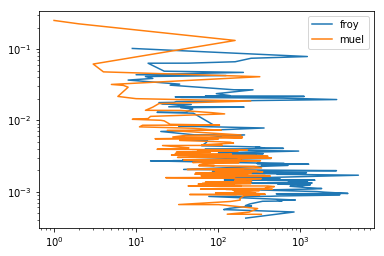

In [125]:
plt.plot(Froy_bcc[:,0],Froy_bcc[:,1],label="froy")
plt.plot(Muel_cubic[:,0],Muel_cubic[:,1],label="muel")
#plt.xlim(0.0005,.004)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

In [149]:
def binned_array(kpd_all,n):
    binned_kpd_all = []
    n_kpd = len(kpd_all)
    for i in range(n_kpd):
        temp = []
        for j in range(-n,n+1):
            if i+j >0 and i+j <n_kpd-1:
                temp.append(kpd_all[i+j])
        binned_kpd_all.append(np.mean(temp))
    return binned_kpd_all

In [161]:
avg_bin = 5
plt.plot(err_sc,binned_array(kpd_sc,avg_bin),label="Froyen sc")
plt.plot(err_bcc,binned_array(kpd_bcc,avg_bin),label="Froyen bcc")
plt.plot(err_fcc,binned_array(kpd_fcc,avg_bin),label="Froyen fcc")
plt.plot(err_hcp,binned_array(kpd_hcp,2),label="Froyen hcp")
plt.plot(err_afl,binned_array(kpd_afl,avg_bin),label="AFLOW")
plt.plot(err_hes,binned_array(kpd_hes,avg_bin),label="Hess")
#plt.plot(err_hes_bcc,binned_array(kpd_hes_bcc,avg_bin),label="Hess bcc")
#plt.plot(err_hes_fcc,binned_array(kpd_hes_fcc,avg_bin),label="Hess fcc")
#plt.plot(err_hes_hcp,binned_array(kpd_hes_hcp,avg_bin),label="Hess hcp")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Error (eV/atom)")
plt.ylabel("Ratio of irreducible K-points (Method/GMP)")
plt.legend(loc="upper right")
plt.title("Average speedup of various K-point selection methods vs generalized Monkhorst-Pack")
plt.xlim([.2E-3,1E0])
#plt.show()
plt.savefig("../plots/All_vs_Mueller_corrected.pdf")

In [151]:
print(np.mean(kpd_afl))
print(np.mean(kpd_hes))
print(np.mean(kpd_bcc))
print(np.mean(kpd_fcc))
print(np.mean(kpd_hcp))
print(np.mean(kpd_sc))
means = [np.mean(kpd_hes),np.mean(kpd_afl),np.mean(kpd_bcc),np.mean(kpd_fcc),np.mean(kpd_hcp),np.mean(kpd_sc)]
print("average overall: ",np.mean(means))

1.4449348302
1.0853343075
2.30619915296
3.13593572742
1.04164366328
1.48234591872
('average overall: ', 1.7493989333486957)


In [154]:
print(np.mean(kpd_hes_bcc))
print(np.mean(kpd_hes_fcc))
print(np.mean(kpd_hes_hcp))

1.079109109
1.12000954902
1.24682723777


In [66]:
len(kpd_hes_fcc)

154